In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Statistical Mechanics
## Boltzmann distribution
Consider a system of $N$ energy levels with energies
$0,\epsilon,2\epsilon, \cdots ,\left(N-1\right)\times\epsilon$ and
$\epsilon>0$.

![boltzmann](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/12024/23c9eccac4fe4b1b960c14f7904e5e37/19108705-e23e-430a-a5bd-e29c289beb02.png)

*A system of $N$ energy levels with energies
$0,\epsilon,2\epsilon, \cdots ,\left(N-1\right)\times\epsilon$
 $\left(\epsilon>0\right)$.*

1. Calculate, using the given code, the occupancy of each level
for different values of the temperature. 
What happens at high temperatures? (Note that the temperature $T$ is
expressed in reduced units, that is, $k_B=1$).

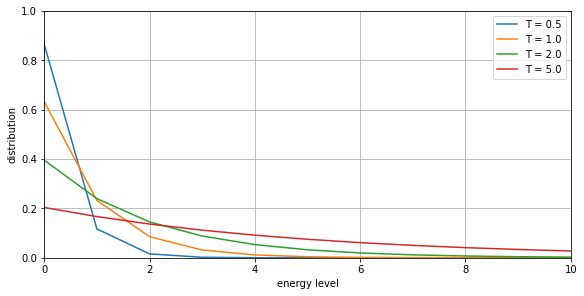

In [2]:
def boltzmann_weight(energy: float, beta: float) -> float:
    """ return the Boltzmann weight evaluated at energy and beta """
    return np.exp(-energy * beta)

n = 10  # the number of energy levels

energy_levels = np.linspace(0, n, n + 1)
kts = np.array([0.5, 1.0, 2.0, 5.0])

fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True)
ax.grid()

for kt in kts:
    beta = 1.0 / kt
    weights = boltzmann_weight(energy_levels, beta)
    partition_function = np.sum(weights)
    occupancy = weights / partition_function
    ax.plot(occupancy, label=f"T = {kt}")

ax.set_xlabel("energy level")
ax.set_ylabel("distribution")
ax.set_xlim([energy_levels.min(), energy_levels.max()])
ax.set_ylim(0, 1.0)
ax.legend()
plt.show()

2. Change the code in such a way that the degeneracy of energy
level $i$ equals $i+1$. What do you see?

__Answer:__
$$ p\propto \omega_i e^{-\beta E} $$

3. Modify the program in such a way that the occupation of the
energy levels as well as the partition function ($q$) is calculated
for a linear rotor with moment of inertia $I$. Compare your result
with the approximate result
\begin{equation}
q = \frac{2I}{\beta \, \hbar^2} \qquad\qquad \frac{I}{\hbar^2}=1
\end{equation}
for different temperatures. Note that the energy levels of a linear
rotor are
\begin{equation}
U = J \left(J+1\right) \frac{\hbar^2}{2I}
\end{equation}
with $J=0,1,2, \cdots ,\infty$. The degeneracy of level $J$ equals
$2J+1$.

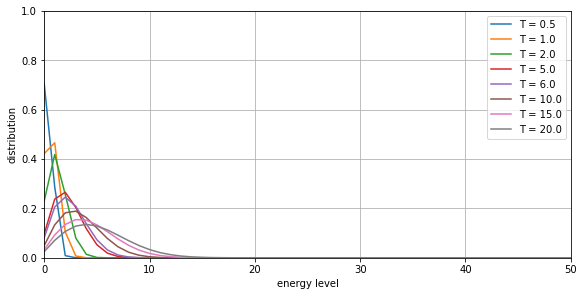

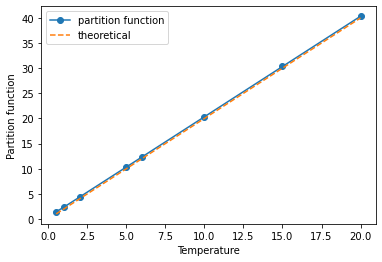

In [6]:
def boltzmann_weight(energy: float, beta: float) -> float:
    """ return the Boltzmann weight evaluated at energy and beta """
    return np.exp(-energy * beta)

n = 50  # the number of energy levels

energy_levels = np.linspace(0, n, n + 1)
energies = energy_levels*(energy_levels+1)/2

kts = np.array([0.5, 1.0, 2.0, 5.0,6.0,10,15,20])

fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True)
ax.grid()
all_part=[]

for kt in kts:
    beta = 1.0 / kt
    degeneracy = energy_levels*2+1
    weights = boltzmann_weight(energies, beta)*degeneracy
    partition_function = np.sum(weights)
    all_part.append(partition_function)
    occupancy = weights / partition_function
    ax.plot(occupancy, label=f"T = {kt}")

ax.set_xlabel("energy level")
ax.set_ylabel("distribution")
ax.set_xlim([energy_levels.min(), energy_levels.max()])
ax.set_ylim(0, 1.0)
ax.legend()
plt.show()

plt.figure(2)
plt.plot(kts,all_part,'-o',label='partition function')
plt.xlabel('Temperature')
plt.ylabel('Partition function')
plt.plot(kts,2*kts,'--',label='theoretical')
plt.legend()

# derivation for partition function
利用高温下能级差相对于$k_B T$较小，将求和转换为积分
1.  **线性转子的能量和简并度**
    $$
    E_J = J(J+1) \frac{\hbar^2}{2I}, \quad g_J = 2J+1, \quad J=0, 1, 2, \dots
    $$

2.  **配分函数定义** ($\beta = 1/(k_B T)$)
    $$
    q = \sum_{J=0}^{\infty} g_J e^{-\beta E_J}
    $$

3.  **代入线性转子表达式**
    $$
    q = \sum_{J=0}^{\infty} (2J+1) e^{-\beta J(J+1) \frac{\hbar^2}{2I}}
    $$

4.  **高温近似** ($T \gg \hbar^2 / (2Ik_B)$)：求和用积分代替
    $$
    q \approx \int_{0}^{\infty} (2J+1) e^{-\beta J(J+1) \frac{\hbar^2}{2I}} dJ
    $$

5.  **变量替换**：令 $x = J(J+1)$, 则 $dx = (2J+1) dJ$
    $$
    q \approx \int_{0}^{\infty} e^{-\beta x \frac{\hbar^2}{2I}} dx
    $$

6.  **计算积分** （利用 $\int_0^\infty e^{-ax} dx = 1/a$）
    $$
    q \approx \frac{1}{\beta \frac{\hbar^2}{2I}}
    $$

7.  **最终近似结果**
    $$
    q \approx \frac{2I}{\beta \hbar^2}
    $$